In [2]:
'''
URJC / GIA / Aprendizaje Automático 1 / Curso 23-24
alfredo.cuesta@urjc.es
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.precision", 4)
plt.rcParams['figure.figsize']=(4,4)

# Puntos, rectas, planos e hiperplanos

Al terminar este cuaderno habremos repasado algunos conceptos de geometría que serán imprescindibles de aquí en adelante.<br>
El más importante de todos es posiblemente el hecho de que:
- un hiperplano es una combinación lineal de variables que da como resultado 0,
- y modificando su vector característico modificamos todo el hiperplano.

De paso veremos _trucos_ de código para representar conjuntos de datos e incluso clasificadores.

### Puntos

Si vamos a representar puntos en un plano entonces estamos asumiendo que esos puntos tienen 2 coordenadas.

En ese caso podemos utilizar un _scatter plot_.

Por ejemplo:

In [8]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(wine_df.info())

x_feature = 'alcohol'
y_feature = 'ash'
mark_size = 10
alpha = 0.4
wine_df.plot.scatter(x=x_feature, y=y_feature,
                     s=mark_size, alpha=alpha)

AttributeError: module 'matplotlib.pyplot' has no attribute 'load_wine'

Si son puntos en un espacio 3D entonces los puntos tienen 3 coordenadas. <br>
Sin embargo tenemos que recurrir a `matplotlib` para hacer un _scatter plot_ 3D ya que Pandas no lo permite.

Por ejemplo:

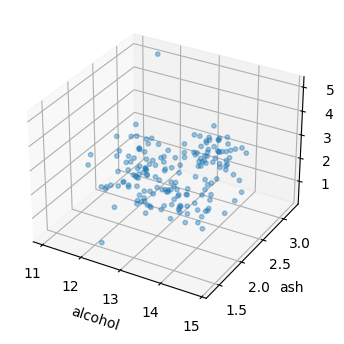

In [ ]:
x_feature = 'alcohol'
y_feature = 'ash'
z_feature = 'flavanoids'
mark_size = 10
alpha = 0.4

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(wine_df[x_feature], wine_df[y_feature], wine_df[z_feature],
           s=mark_size, alpha = alpha)
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)

plt.show()

Tambień es posible mostrar puntos de hasta 6 dimensiones un plano utilizando _trucos_ como cambiar el tamaño del marcador, el color, etc.

### Rectas

Una recta se define a partir de un punto que se traslada en la dirección marcada por un vector _director_ $\bf v$.

Para mostrar una recta necesitamos un espacio de dimension $D\ge 2$.
Cuando $D=2$ podemos dar su expresión matemática con una única ecuación implícita y también con una única ecuación explícita.

**Ecuación implícita**$\quad$
La recta que pasa por el punto $(a,b)$ y el vector director ${\bf v} = (v_1, v_2)^\top $ son todos aquellos puntos del espacio $x=(x_1, x_2)\in\mathbb R ^2$ que satisfacen:
$$
c_0 + c_1x_1 + c_2x_2 = 0, \\\text{tal que} \left\lbrace
  \begin{array}{l}
  c_0=a\frac{v_2}{v_1} - b \\
  c_1=-\frac{v_2}{v_1} \\
  c_2=1\\
  \end{array}
\right.
$$

**Ecuación explícita**$\quad$ Si colocamos $x_1$ en el eje horizontal y $x_2$ en el eje vertical podemos generar puntos de la recta dando valores a $x_1\in \mathbb R$ y obteniendo $x_2$ mediante la ecuación
$$
x_2 = \left(\frac{v_2}{v_1}\right)x_1 + \left(b-a\frac{v_2}{v_1}\right),
$$
que se suele ver con esta otra expresión:
$$x_2 = m x_1 + x_0,$$
donde $x_0$ es el _punto de intercepción_ de la recta con el eje vertical, o sea el valor de $x_2$ cuando $x_1=0$.

**Vector característico**$\quad$
Es el vector perpependicular al vector director y se define
$${\bf c} = (c_1, c_2)^\top$$


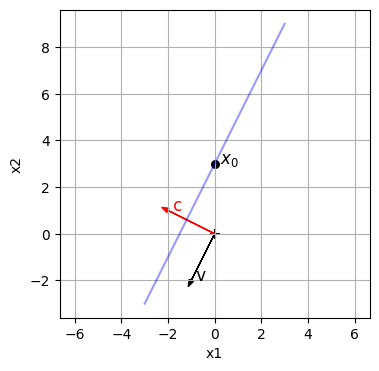

In [4]:
# Ejemplo de recta con vector director _v_ y un punto de intercepción _x0_

x0 = 3
v = [-1., -2.]

m = v[1]/v[0]
x1 = np.linspace(-3,3,10)
x2 = x0 + m*x1

# recta
plt.plot(x1,x2,'b', alpha=0.4)
# punto de intercepción
plt.scatter(0,x0,c='k',s=30)
plt.text( 0,x0, ' $x_0$', fontsize=12, color='black')
# origen de coordenadas
plt.scatter(0, 0,  s=60, marker='+', c='k')
# vector director v
plt.arrow(0, 0, v[0], v[1],
          head_width=0.2, head_length=0.3, fc='black', ec='black')
plt.text( v[0], v[1], ' v', fontsize=12, color='black')
# vector característico c
plt.arrow(0,0, -m, 1.,
          head_width=0.2, head_length=0.3, fc='red', ec='red')
plt.text( -m, 1., ' c', fontsize=12, color='red')

plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

## Planos

Una plano  se define a partir de un punto que se traslada por la superficie perpendicular al vector _característico_ $\bf c$.

> En un plano **no** podemos hablar de un vector director.<br> En todo caso sería de dos vectores generadores $~{\bf u}_1~$ y $~{\bf u}_2~$ tal que $~{\bf c} = {\bf u_1}\wedge {\bf u_2},~$ donde $\wedge$ es el producto vectorial.

Para mostrar una plano necesitamos un espacio de dimension $D\ge 3$.

**Ecuación implícita**$\quad$
La plano que pasa por el punto $(p,q,r)$ y tiene vector característico ${\bf c} = (c_1, c_2, c_3)^\top $ son todos aquellos puntos del espacio $x=(x_1, x_2, x_3)\in\mathbb R ^2$ que satisfacen:
$$
c_0 + c_1x_1 + c_2x_2 + c_3x_3= 0, \\\text{tal que }
  \begin{array}{l}
  c_0=-\big(pc_1 + qc_2 + rc_3\big)\\
  \end{array}
$$

Es frecuente simplificar eligiendo directamente el valor del **término independiente** $~c_0.~$

**Ecuación explícita**$\quad$ Si colocamos $x_1$ en un eje horizontal y $x_2$ en el otro eje horizontal podemos generar puntos del plano dando pares $(x_1, x_2)\in \mathbb R^2$ y obteniendo $x_3$ en el eje vertical simplemente despejandolo
$$
x_3 = \left(-\frac{c_1}{c_3}\right)x_1
    + \left(-\frac{c_2}{c_3}\right)x_2
    + \left(-\frac{c_0}{c_3}\right)
$$
A partir de esta ecuación es fácil obtener el punto de intercepción del plano con el eje vertical. <br>Basta con hacer $~x_1=x_2=0.$

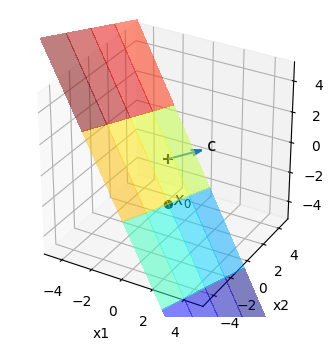

In [ ]:
# Ejemplo de recta con vector director _c_ y término independiente _c0_

c0 = 3
c = [2,.3,1]

x1 = np.linspace(-5,5,5)
x2 = np.linspace(-5,5,5)
xx1,xx2 = np.meshgrid(x1,x2)

intercep = (-c0/c[2])
x3 = intercep + (-c[0]/c[2])*xx1 + (-c[1]/c[2])*xx2

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# recta
surf = ax.plot_surface(xx1,xx2,x3, cmap='jet', alpha=0.5,
                       linewidth=0, antialiased=False)
# punto de intercepción
ax.scatter(0,0,intercep,c='k',s=30)
ax.text( 0, 0, intercep, ' $x_0$', fontsize=12, color='black')
# origen de coordenadas
ax.scatter(0, 0, 0, s=60, marker='+', c='k')
# vector director c
ax.quiver(0, 0, 0, c[0], c[1], c[2])
ax.text( c[0], c[1], c[2], ' c', fontsize=12, color='black')

ax.grid()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.axes.set_xlim3d(-5, 5)
ax.axes.set_ylim3d(-5, 5)
ax.axes.set_zlim3d(-5, 5)
ax.set_box_aspect([1.0, 1.0, 1.0])
plt.show()

## Hiperplanos

Una hiperplano en la generalización a $D$ dimensiones de un plano.

Viene definido por un vector característico ${\bf c}=(c_1,\ldots,c_D)^\top$ y un término independiente $c_0$; <br> y su ecuación implícita es
$$
c_0 + c_1x_1 + \cdots + c_Dx_D =  0,
$$
que se suele simplificar utilizando el producto escalar del vector característico por un vector de variables ${\bf x} = (x_1,\ldots,x_D)^\top$; <br>
es decir
$$
c_0 + {\bf c}^\top {\bf x} = 0
$$

Evidentemente, ya no podemos representarlo en una pantalla.

Como podemos ver, la ecuación implícita del hiperplano, y de todos los demás elementos que hemos visto de dimensión menor, es la **combinación lineal** de las variables, donde los coeficientes son precisamente el  vector característico.
<br>
Los puntos del hiperplano son aquellos que satisfacen la ecuación, es decir que al evaluarlos dan 0.

<u>¿ Y el término independiente ?</u>

A veces se añade una variable _dummy_ para "eliminarlo" de la expresión.

Una variable _dummy_ es una variable fija a 1, de manera que el vector de variables pasa a ser $~{\bf x} = (1, x_1, x_2, \ldots, x_D)^\top.$

Entonces la ecuación implícita del hiperplano queda simplemente:
$$
{\bf c}^\top {\bf x} = 0,
$$
donde ahora ${\bf c} = (c_0, c_1, \ldots, c_D)^\top.$
